In [375]:
import numpy as np
import pandas as pd
from config_ihdp import args

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

%load_ext autoreload
%autoreload 2

from sklearn.linear_model import LogisticRegression

# from miwae import miwae
# from metrics import tau_dr, tau_ols, tau_ols_ps
# from generate_data import gen_lrmf, ampute, gen_dlvm
l_tau = ['tau_dr', 'tau_ols', 'tau_ols_ps', 'mul_tau_dr', 'mul_tau_ols', 'mul_tau_ols_ps']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [435]:
from baseline import *

## Choose metric

In [378]:
loss = '|tau-tau_ols|'

save_plots = False

set_id_range = list(range(1,1001))

## Compute true ATE

In [379]:
tau = []
for set_id in set_id_range:
    X = pd.read_csv('./data/IHDP/csv/R_ate_ihdp_npci_' + str(set_id) + '.csv')
    #print('y1-y0:', np.mean((X.iloc[:,0]==1)*(X.iloc[:,1]  - X.iloc[:,2]) +(X.iloc[:,0]==0)*(X.iloc[:,2]  - X.iloc[:,1])))
    tau.append(np.mean(X.iloc[:,4]  - X.iloc[:,3]))
    
gt = pd.DataFrame({'tau': tau, 'set_id': set_id_range})

gt.head()

,tau,set_id
0,4.000576,1
1,3.999436,2
2,3.998950,3
3,3.999835,4
4,3.998865,5


## Load data

In [421]:
df_mice = load_results('2019-11-07_ihdp_mi.csv_temp')
df_mice_ = load_results('2019-11-07_ihdp_mi_2.csv_temp')
df_mice = pd.concat((df_mice, df_mice_))

df_mice['algo'] = 'mice'
df_mice = df_mice[['set_id','prop_miss','method','tau_dr', 'tau_ols', 'tau_ols_ps',
                       '|1-tau_dr|', '|1-tau_ols|','|1-tau_ols_ps|', 'algo']]

# df_mice = load_results('2019-10-25_ihdp_mi.csv')
# df_mice['algo'] = 'mice'
# df_mice = df_mice[['set_id','prop_miss','method','tau_dr', 'tau_ols', 'tau_ols_ps',
#                        '|1-tau_dr|', '|1-tau_ols|','|1-tau_ols_ps|', 'algo']]

# df_mice_50 = load_results('2019-10-29_ihdp_mi.csv_temp')
# df_mice_50['algo'] = 'mice'
# df_mice_50 = df_mice_50[['set_id','prop_miss','method','tau_dr', 'tau_ols', 'tau_ols_ps',
#                        '|1-tau_dr|', '|1-tau_ols|','|1-tau_ols_ps|', 'algo']]

# df_mice = pd.concat((df_mice, df_mice_50))

df_mice = df_mice.loc[df_mice['set_id']<=np.max(list(set_id_range)),]


df_mice['tau'] = np.nan
for set_id in set_id_range:
    df_mice.loc[df_mice['set_id']== set_id, 'tau'] = float(gt.loc[gt['set_id']==set_id, 'tau'])

df_mice['|tau-tau_dr|'] = abs(df_mice['tau_dr'] - df_mice['tau'])
df_mice['|tau-tau_ols|'] = abs(df_mice['tau_ols'] - df_mice['tau'])
df_mice['|tau-tau_ols_ps|'] = abs(df_mice['tau_ols_ps'] - df_mice['tau'])
    
df_mice_all = df_mice.copy()
print(df_mice.shape)

print('\n0% NA, ols: '+ str(np.mean(df_mice.loc[df_mice['prop_miss']==0,'|tau-tau_ols|'])) + '\t \pm ' +
      str(standard_error(df_mice.loc[df_mice['prop_miss']==0,'|tau-tau_ols|'])))
print('0% NA, dr: '+ str(np.mean(df_mice.loc[df_mice['prop_miss']==0,'|tau-tau_dr|'])) + '\t \pm ' + 
      str(standard_error(df_mice.loc[df_mice['prop_miss']==0,'|tau-tau_dr|'])))
print('0% NA, ols+ps: '+ str(np.mean(df_mice.loc[df_mice['prop_miss']==0,'|tau-tau_ols_ps|'])))

print('\n10% NA, ols: '+ str(np.mean(df_mice.loc[df_mice['prop_miss']==0.1,'|tau-tau_ols|'])) + '\t \pm ' +
      str(standard_error(df_mice.loc[df_mice['prop_miss']==0.1,'|tau-tau_ols|'])))
print('10% NA, dr: '+ str(np.mean(df_mice.loc[df_mice['prop_miss']==0.1,'|tau-tau_dr|'])) + '\t \pm ' + 
      str(standard_error(df_mice.loc[df_mice['prop_miss']==0.1,'|tau-tau_dr|'])))
print('10% NA, ols+ps: '+ str(np.mean(df_mice.loc[df_mice['prop_miss']==0.1,'|tau-tau_ols_ps|'])))


print('\n30% NA, ols: '+ str(np.mean(df_mice.loc[df_mice['prop_miss']==0.3,'|tau-tau_ols|'])) + '\t \pm ' +
      str(standard_error(df_mice.loc[df_mice['prop_miss']==0.3,'|tau-tau_ols|'])))
print('30% NA, dr: '+ str(np.mean(df_mice.loc[df_mice['prop_miss']==0.3,'|tau-tau_dr|'])) + '\t \pm ' + 
      str(standard_error(df_mice.loc[df_mice['prop_miss']==0.3,'|tau-tau_dr|'])))
print('30% NA, ols+ps: '+ str(np.mean(df_mice.loc[df_mice['prop_miss']==0.3,'|tau-tau_ols_ps|'])))

print('\n50% NA, ols: '+ str(np.mean(df_mice.loc[df_mice['prop_miss']==0.5,'|tau-tau_ols|'])) + '\t \pm ' + \
                                     str(standard_error(df_mice.loc[df_mice['prop_miss']==0.5,'|tau-tau_ols|'])))
print('50% NA, dr: '+ str(np.mean(df_mice.loc[df_mice['prop_miss']==0.5,'|tau-tau_dr|'])) + '\t \pm '+ \
                                  str(standard_error(df_mice.loc[df_mice['prop_miss']==0.5,'|tau-tau_dr|'])))
print('50% NA, ols+ps: '+ str(np.mean(df_mice.loc[df_mice['prop_miss']==0.5,'|tau-tau_ols_ps|'])))

print('\n70% NA, ols: '+ str(np.mean(df_mice.loc[df_mice['prop_miss']==0.7,'|tau-tau_ols|'])) + '\t \pm ' + \
                                     str(standard_error(df_mice.loc[df_mice['prop_miss']==0.7,'|tau-tau_ols|'])))
print('70% NA, dr: '+ str(np.mean(df_mice.loc[df_mice['prop_miss']==0.7,'|tau-tau_dr|'])) + '\t \pm '+ \
                                  str(standard_error(df_mice.loc[df_mice['prop_miss']==0.7,'|tau-tau_dr|'])))
print('70% NA, ols+ps: '+ str(np.mean(df_mice.loc[df_mice['prop_miss']==0.7,'|tau-tau_ols_ps|'])))

print('\n90% NA, ols: '+ str(np.mean(df_mice.loc[df_mice['prop_miss']==0.9,'|tau-tau_ols|'])) + '\t \pm ' + \
                                     str(standard_error(df_mice.loc[df_mice['prop_miss']==0.9,'|tau-tau_ols|'])))
print('90% NA, dr: '+ str(np.mean(df_mice.loc[df_mice['prop_miss']==0.9,'|tau-tau_dr|'])) + '\t \pm '+ \
                                  str(standard_error(df_mice.loc[df_mice['prop_miss']==0.9,'|tau-tau_dr|'])))
print('90% NA, ols+ps: '+ str(np.mean(df_mice.loc[df_mice['prop_miss']==0.9,'|tau-tau_ols_ps|'])))


results.shape (2100, 15)
results.shape (3000, 15)
(5100, 14)

0% NA, ols: 0.7246023470214508	 \pm 0.04665471579137205
0% NA, dr: 0.12663221240362083	 \pm 0.0042086177086225005
0% NA, ols+ps: 0.7167774431772118

10% NA, ols: 0.6584240004771152	 \pm 0.04226504570101152
10% NA, dr: 0.11245483734511617	 \pm 0.00350338732793326
10% NA, ols+ps: 0.6523393556358628

30% NA, ols: 0.4934085801787941	 \pm 0.030788348928001606
30% NA, dr: 0.11662072126954529	 \pm 0.003956621046555039
30% NA, ols+ps: 0.4897789135718878

50% NA, ols: 0.22565053092113227	 \pm 0.010265912280453132
50% NA, dr: 0.17957317630649386	 \pm 0.006489259250495639
50% NA, ols+ps: 0.22629990263091765

70% NA, ols: 0.2174167304432749	 \pm 0.008642787010303427
70% NA, dr: 0.2397367305005275	 \pm 0.009219843132334796
70% NA, ols+ps: 0.21521748649120745

90% NA, ols: 0.2757432438509389	 \pm 0.010724686255127439
90% NA, dr: 0.2655682468064327	 \pm 0.01020498841254993
90% NA, ols+ps: 0.2786291483385224


In [440]:
df_cevae = pd.read_csv('results/' + 'ihdp_08.1_11_cevae.csv_temp') # n_epochs = 100
df_cevae.drop(labels='Unnamed: 0', inplace=True, axis=1)
df_cevae_ = pd.read_csv('results/' + 'ihdp_08.2_11_cevae.csv_temp') # n_epochs = 100
df_cevae_.drop(labels='Unnamed: 0', inplace=True, axis=1)
df_cevae = pd.concat((df_cevae, df_cevae_))

# df_cevae = pd.read_csv('results/' + 'ihdp_07.1_11_cevae.csv_temp') # n_epochs = 10
# df_cevae.drop(labels='Unnamed: 0', inplace=True, axis=1)

# df_cevae_ = pd.read_csv('results/' + 'ihdp_07.2_11_cevae.csv_temp') # n_epochs = 10 and larger prop_miss
# df_cevae_.drop(labels='Unnamed: 0', inplace=True, axis=1)
# df_cevae = pd.concat((df_cevae, df_cevae_))

df_cevae['algo'] = 'cevae'
df_cevae = df_cevae[['set_id','prop_miss','method','tau_cevae', 'algo']]

df_cevae = df_cevae.loc[df_cevae['set_id']<=np.max(list(set_id_range)),]
print('results.shape', df_cevae.shape)

df_cevae['tau'] = np.nan
for set_id in set_id_range:
    df_cevae.loc[df_cevae['set_id']== set_id, 'tau'] = float(gt.loc[gt['set_id']==set_id, 'tau'])

df_cevae['|tau-tau_dr|'] = abs(df_cevae['tau_cevae'] - df_cevae['tau'])
df_cevae['|tau-tau_ols|'] = abs(df_cevae['tau_cevae'] - df_cevae['tau'])
df_cevae['|tau-tau_ols_ps|'] = abs(df_cevae['tau_cevae'] - df_cevae['tau'])
    
df_cevae_all = df_cevae.copy()
df_cevae.head()

for prop_miss in [0, 0.1, 0.3, 0.5, 0.7, 0.9]:
    print(prop_miss, 'cevae: mean ', loss,':', np.mean(df_cevae.loc[(df_cevae['algo']=='cevae') & (df_cevae['prop_miss']==prop_miss), loss]),
                  'std: ',standard_error(df_cevae.loc[(df_cevae['algo']=='cevae') & (df_cevae['prop_miss']==prop_miss), loss]))



/Users/imke_mayer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


results.shape (3973, 5)
0 cevae: mean  |tau-tau_dr| : 0.3421703361615951 std:  0.015708548029254147
0.1 cevae: mean  |tau-tau_dr| : 0.31440092476868786 std:  0.013314017058848604
0.3 cevae: mean  |tau-tau_dr| : 0.38355689565718115 std:  0.01656224273834346
0.5 cevae: mean  |tau-tau_dr| : 0.38427623951205114 std:  0.016996442105986317
0.7 cevae: mean  |tau-tau_dr| : nan std:  nan
0.9 cevae: mean  |tau-tau_dr| : nan std:  nan


In [392]:
df = load_results('ihdp_10.1_11.csv_temp') # n_epochs = 100, d_miwae=5, sig_prior = 1
#df = load_results('ihdp_08.1_11.csv_temp') # n_epochs = 100
# df = load_results('ihdp_07.1_11.csv_temp') # n_epochs = 10
# df_ = load_results('ihdp_07.2_11.csv_temp') # n_epochs = 10 and larger prop_miss
# df = pd.concat((df, df_))
df.loc[df['algo']=='miwae_','algo'] = 'MDC.process' 

# df = load_results('ihdp_25.1_10.csv_temp')
# df.loc[df['algo']=='miwae_','algo'] = 'MDC.process' 

# df_50 = load_results('ihdp_25.2_10.csv_temp')
# df_50.loc[df_50['algo']=='miwae_','algo'] = 'MDC.process' 

# df = pd.concat((df, df_50))

df_ = df.copy()
df_['algo'] = 'MDC.mi'
df_['tau_dr'] = df_['mul_tau_dr']
df_['tau_ols'] = df_['mul_tau_ols']
df_['tau_ols_ps'] = df_['mul_tau_ols_ps']
df_['|1-tau_dr|'] = abs(1-df_['mul_tau_dr'])
df_['|1-tau_ols|'] = abs(1-df_['mul_tau_ols'])
df_['|1-tau_ols_ps|'] = abs(1-df_['mul_tau_ols_ps'])

tt=list(df_.columns[:list(df_.columns).index('|1-tau_ols_ps|')])
tt.append('algo')
print(tt)

df_ = df_[tt]
df = df[tt]

df = pd.concat([df, df_]) 

df['tau'] = np.nan
for set_id in set_id_range:
    df.loc[df['set_id']== set_id, 'tau'] = float(gt.loc[gt['set_id']==set_id, 'tau'])

df['|tau-tau_dr|'] = abs(df['tau_dr'] - df['tau'])
df['|tau-tau_ols|'] = abs(df['tau_ols'] - df['tau'])
df['|tau-tau_ols_ps|'] = abs(df['tau_ols_ps'] - df['tau'])


df = df.loc[df['set_id']<=np.max(list(set_id_range)),]
print('results.shape', df.shape)

df.head()
#df.columns.tolist()

results.shape (193, 21)
['prop_miss', 'set_id', 'd_miwae', 'n_epochs', 'sig_prior', 'method', 'time', 'add_wy', 'tau_dr', 'tau_ols', 'tau_ols_ps', 'tau_resid', 'mul_tau_dr', 'mul_tau_ols', 'mul_tau_ols_ps', 'mul_tau_resid', 'dcor_zhat', 'dcor_zhat_mul', '|1-tau_dr|', '|1-tau_ols|', 'algo']
results.shape (386, 25)


,prop_miss,set_id,d_miwae,n_epochs,sig_prior,method,time,add_wy,tau_dr,tau_ols,...,mul_tau_resid,dcor_zhat,dcor_zhat_mul,|1-tau_dr|,|1-tau_ols|,algo,tau,|tau-tau_dr|,|tau-tau_ols|,|tau-tau_ols_ps|
0,0.1,1,5,100,1,glm,61,False,3.965476,3.921249,...,3.928492,NaN,NaN,2.965476,2.921249,MDC.process,4.000576,0.035100,0.079327,0.066857
1,0.3,1,5,100,1,glm,55,False,4.009469,3.992767,...,3.984541,NaN,NaN,3.009469,2.992767,MDC.process,4.000576,0.008892,0.007809,0.015900
2,0.0,1,5,100,1,glm,56,False,4.005794,4.015836,...,3.996516,NaN,NaN,3.005794,3.015836,MDC.process,4.000576,0.005218,0.015260,0.021710
3,0.1,2,5,100,1,glm,57,False,3.963502,3.810037,...,3.829205,NaN,NaN,2.963502,2.810037,MDC.process,3.999436,0.035934,0.189399,0.199529
4,0.3,2,5,100,1,glm,57,False,4.006676,3.891918,...,3.911722,NaN,NaN,3.006676,2.891918,MDC.process,3.999436,0.007240,0.107518,0.107591


In [433]:
df = load_results('ihdp_11.1_11.csv_temp', prefix = 'res_tau_') # n_epochs = 100, d_miwae=5, sig_prior = 1
df.loc[df['algo']=='miwae_','algo'] = 'MDC.process'
df['method'] = 'glm'

df['tau_dr'] = df['res_tau_dr']
df['tau_ols'] = df['res_tau_ols']
df['tau_ols_ps'] = df['res_tau_ols_ps']

df['mul_tau_dr'] = df['res_mul_tau_dr']
df['mul_tau_ols'] = df['res_mul_tau_ols']
df['mul_tau_ols_ps'] = df['res_mul_tau_ols_ps']

df = df[list(set(df.columns)-set(['res_tau_dr','res_tau_ols','res_tau_ols_ps','res_tau_resid',
               'res_mul_tau_dr','res_mul_tau_ols','res_mul_tau_ols_ps', 'res_mul_tau_resid']))]

df_ = df.copy()
df_['algo'] = 'MDC.mi'
df_['tau_dr'] = df_['mul_tau_dr']
df_['tau_ols'] = df_['mul_tau_ols']
df_['tau_ols_ps'] = df_['mul_tau_ols_ps']
df_['|1-tau_dr|'] = abs(1-df_['mul_tau_dr'])
df_['|1-tau_ols|'] = abs(1-df_['mul_tau_ols'])
df_['|1-tau_ols_ps|'] = abs(1-df_['mul_tau_ols_ps'])

tt=list(set(df.columns)-set(['mul_tau_dr','mul_tau_ols','mul_tau_ols_ps']))

df_ = df_[tt]
df = df[tt]

df = pd.concat([df, df_]) 

df['tau'] = np.nan
for set_id in set_id_range:
    df.loc[df['set_id']== set_id, 'tau'] = float(gt.loc[gt['set_id']==set_id, 'tau'])

df['|tau-tau_dr|'] = abs(df['tau_dr'] - df['tau'])
df['|tau-tau_ols|'] = abs(df['tau_ols'] - df['tau'])
df['|tau-tau_ols_ps|'] = abs(df['tau_ols_ps'] - df['tau'])


df = df.loc[df['set_id']<=np.max(list(set_id_range)),]
print('results.shape', df.shape)

df = df[list(['prop_miss', 'set_id', 'd_miwae', 'n_epochs', 'sig_prior', 
              'method','add_wy',
              'tau_dr', 'tau_ols', 'tau_ols_ps', 
              'dcor_zhat', 'dcor_zhat_mul', '|tau-tau_dr|', '|tau-tau_ols|', '|tau-tau_ols_ps|', 'algo'])]

df.head()
#df.columns.tolist()

results.shape (4000, 19)
results.shape (8000, 20)


,prop_miss,set_id,d_miwae,n_epochs,sig_prior,method,add_wy,tau_dr,tau_ols,tau_ols_ps,dcor_zhat,dcor_zhat_mul,|tau-tau_dr|,|tau-tau_ols|,|tau-tau_ols_ps|,algo
0,0.1,1,5,100,1,glm,False,3.965476,3.921249,3.933719,NaN,NaN,0.035100,0.079327,0.066857,MDC.process
1,0.1,2,5,100,1,glm,False,3.944134,3.825384,3.824528,NaN,NaN,0.055302,0.174052,0.174908,MDC.process
2,0.1,3,5,100,1,glm,False,4.021869,3.871922,3.867503,NaN,NaN,0.022919,0.127027,0.131447,MDC.process
3,0.1,4,5,100,1,glm,False,3.890338,3.671889,3.676178,NaN,NaN,0.109497,0.327946,0.323657,MDC.process
4,0.1,5,5,100,1,glm,False,4.129881,4.095986,4.074630,NaN,NaN,0.131016,0.097121,0.075765,MDC.process


In [434]:
df_all = df.copy()

In [145]:
# res=get_ihdp_baseline(set_id = 1, prop_miss=0.1, 
#                       method="glm", show=False, loss = '|1-tau_dr|', set_id_range = list(range(1,13)))
# res

In [439]:
loss='|tau-tau_dr|'
full_baseline = True
n_epochs = 100
sig_prior = 1
for prop_miss in [0.5]:#, 0.1, 0.3]:#, 0.5, 0.7, 0.9]:
    #df_res = df.loc[(df['add_wy'] == False) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)]
    #best_params, df_best = get_best_params(df_res, loss = loss)
    #best_params['full_baseline'] = full_baseline

    print(best_params)
    df_base = get_ihdp_baseline(prop_miss = prop_miss, full_baseline = full_baseline, set_id_range = set_id_range)
    df_base.head()
    tmp = df_base.copy()
    print('MF: mean ', loss,':', np.mean(tmp.loc[(tmp['algo']=='Z_mf'), loss]),
                  'std: ',standard_error(tmp.loc[(tmp['algo']=='Z_mf'), loss]))

{'d_miwae': 5, 'add_wy': False, 'method': 'glm', 'sig_prior': 1, 'n_epochs': 100, 'prop_miss': 0.0, 'full_baseline': True}
MF: mean  |tau-tau_dr| : 0.19144479394283734 std:  0.006801413525947907


## Small prior variance

Proportion of missing values: 0
best_params= {'d_miwae': 10, 'add_wy': False, 'method': 'glm', 'sig_prior': 0.1, 'n_epochs': 100, 'prop_miss': 0.0}
best_params= {'d_miwae': 100, 'add_wy': False, 'method': 'glm', 'sig_prior': 0.1, 'n_epochs': 100, 'prop_miss': 0.0}
{'method': 'glm', 'prop_miss': 0.0}
['glm', 0.0]


/Users/imke_mayer/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


d_miwae : 10
MDC.process: mean  |tau-tau_dr| : 0.24202913237868337 std:  0.061934397567763116
MDC.mi: mean  |tau-tau_dr| : 0.2758320080795955 std:  0.09611923517072858
MF: mean  |tau-tau_dr| : nan std:  nan
cevae: mean  |tau-tau_dr| : nan std:  nan
mice: mean  |tau-tau_dr| : 0.13698451757258975 std:  0.02368150123109722
mean_imp: mean  |tau-tau_dr| : 0.13698451757257973 std:  0.023681501231090227
full: mean  |tau-tau_dr| : 0.13698451757257965 std:  0.023681501231090196
d_miwae : 100
MDC.process: mean  |tau-tau_dr| : 0.2891929017514101 std:  0.06797552973214972
MDC.mi: mean  |tau-tau_dr| : 0.24223226899814743 std:  0.07534095101187643
MF: mean  |tau-tau_dr| : nan std:  nan
cevae: mean  |tau-tau_dr| : nan std:  nan
mice: mean  |tau-tau_dr| : 0.13698451757258975 std:  0.02368150123109722
mean_imp: mean  |tau-tau_dr| : 0.13698451757257973 std:  0.023681501231090227
full: mean  |tau-tau_dr| : 0.13698451757257965 std:  0.023681501231090196
Proportion of missing values: 0.1
best_params= {'d_m

/Users/imke_mayer/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


d_miwae : 10
MDC.process: mean  |tau-tau_dr| : 0.24390844880028265 std:  0.08458101477896093
MDC.mi: mean  |tau-tau_dr| : 0.27656928066750663 std:  0.09607838437860215
MF: mean  |tau-tau_dr| : nan std:  nan
cevae: mean  |tau-tau_dr| : nan std:  nan
mice: mean  |tau-tau_dr| : 0.1270645614959331 std:  0.02488399906309519
mean_imp: mean  |tau-tau_dr| : 0.12333378335862477 std:  0.030032251631698995
full: mean  |tau-tau_dr| : 0.13698451757257965 std:  0.023681501231090196
d_miwae : 100
MDC.process: mean  |tau-tau_dr| : 0.2906937315417642 std:  0.07008362404993349
MDC.mi: mean  |tau-tau_dr| : 0.2600492834789057 std:  0.08510165219148984
MF: mean  |tau-tau_dr| : nan std:  nan
cevae: mean  |tau-tau_dr| : nan std:  nan
mice: mean  |tau-tau_dr| : 0.1270645614959331 std:  0.02488399906309519
mean_imp: mean  |tau-tau_dr| : 0.12333378335862477 std:  0.030032251631698995
full: mean  |tau-tau_dr| : 0.13698451757257965 std:  0.023681501231090196
Proportion of missing values: 0.3
best_params= {'d_miwa

/Users/imke_mayer/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


d_miwae : 10
MDC.process: mean  |tau-tau_dr| : 0.2298486391341878 std:  0.0754580075569354
MDC.mi: mean  |tau-tau_dr| : 0.2777094409319618 std:  0.09689981970956603
MF: mean  |tau-tau_dr| : nan std:  nan
cevae: mean  |tau-tau_dr| : nan std:  nan
mice: mean  |tau-tau_dr| : 0.1531659887976075 std:  0.04131288521486379
mean_imp: mean  |tau-tau_dr| : 0.15320586340593423 std:  0.04195323097753418
full: mean  |tau-tau_dr| : 0.13698451757257965 std:  0.023681501231090196
d_miwae : 100
MDC.process: mean  |tau-tau_dr| : 0.30349864793846687 std:  0.09127971619316436
MDC.mi: mean  |tau-tau_dr| : 0.2710157737737377 std:  0.09446517685345633
MF: mean  |tau-tau_dr| : nan std:  nan
cevae: mean  |tau-tau_dr| : nan std:  nan
mice: mean  |tau-tau_dr| : 0.1531659887976075 std:  0.04131288521486379
mean_imp: mean  |tau-tau_dr| : 0.15320586340593423 std:  0.04195323097753418
full: mean  |tau-tau_dr| : 0.13698451757257965 std:  0.023681501231090196


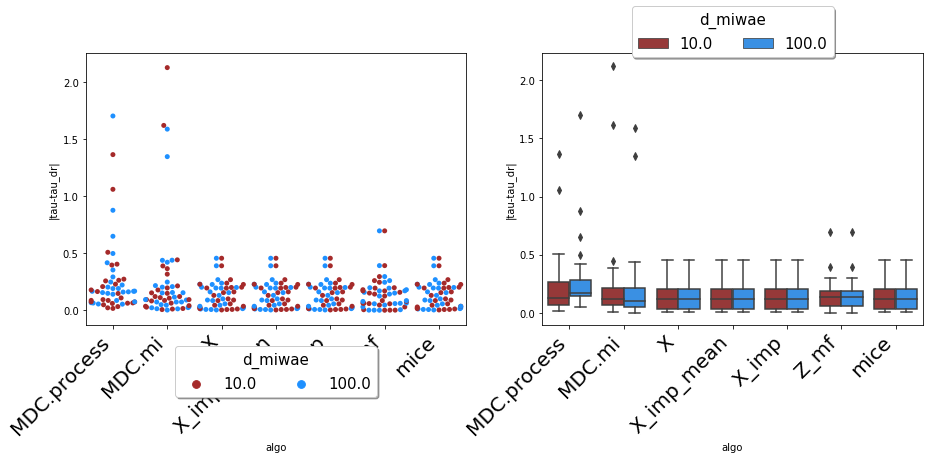

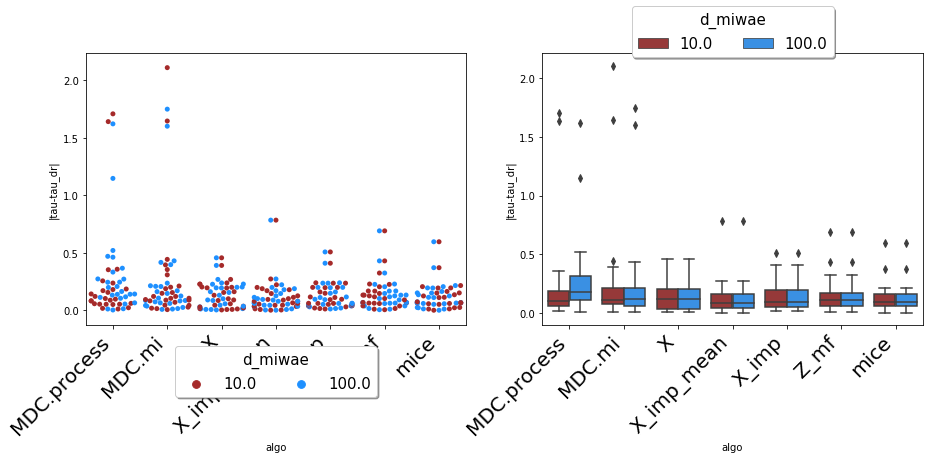

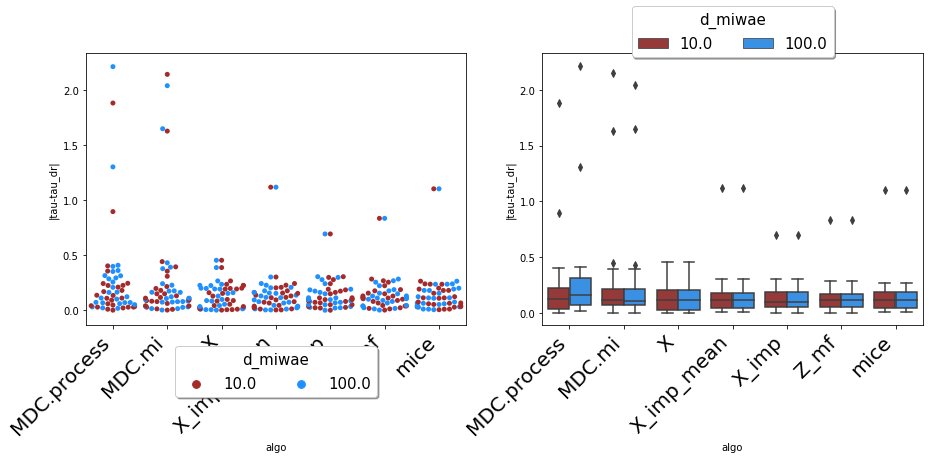

In [276]:
full_baseline = True
n_epochs = 100
sig_prior = 0.1
for prop_miss in [0,0.1,0.3]:#, 0.5, 0.7, 0.9]:
    print('Proportion of missing values:',prop_miss)
    if save_plots:
        boxplot_with_baseline(df.loc[(df['add_wy'] == False) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)],
                              df_mice_results = df_mice, df_cevae_results = df_cevae,
                              loss = loss, set_id_range = set_id_range,
                              baseline = 'ihdp', full_baseline = full_baseline,
                              hue = 'd_miwae', palette=['brown','dodgerblue'], save_plot = 'varyingP.pdf')
    else:
        boxplot_with_baseline(df.loc[(df['add_wy'] == False) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)],
                          df_mice_results = df_mice, df_cevae_results = df_cevae,
                          loss = loss, set_id_range = set_id_range,
                          baseline = 'ihdp',full_baseline = full_baseline,
                          hue = 'd_miwae', palette=['brown','dodgerblue'])

## Medium prior variance

Proportion of missing values: 0.5
best_params= {'d_miwae': 5, 'add_wy': False, 'method': 'glm', 'sig_prior': 1, 'n_epochs': 100, 'prop_miss': 0.5}
{'method': 'glm', 'prop_miss': 0.5}
['glm', 0.5]


/Users/imke_mayer/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


d_miwae : 5
MDC.process: mean  |tau-tau_dr| : 0.19929044045042518 std:  0.0071330375155791576
MDC.mi: mean  |tau-tau_dr| : 0.21956733390061467 std:  0.008032385449844713
MF: mean  |tau-tau_dr| : nan std:  nan
cevae: mean  |tau-tau_dr| : nan std:  nan
mice: mean  |tau-tau_dr| : 0.17957317630649386 std:  0.006489259250495639
mean_imp: mean  |tau-tau_dr| : 0.18146921194014995 std:  0.006232500873159456
full: mean  |tau-tau_dr| : 0.12593227548745975 std:  0.0035286299898165925


/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


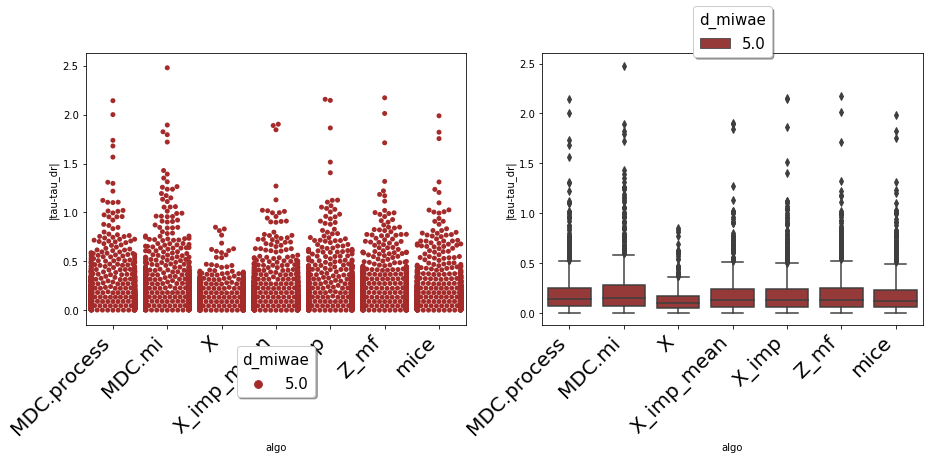

In [437]:
loss='|tau-tau_dr|'
full_baseline = True
n_epochs = 100
sig_prior = 1
for prop_miss in [0.5]:#[0,0.1,0.3]:
    print('Proportion of missing values:',prop_miss)
    if save_plots:
        boxplot_with_baseline(df.loc[(df['add_wy'] == False) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)],
                              df_mice_results = df_mice, df_cevae_results = df_cevae,
                              loss = loss, set_id_range = set_id_range,
                              baseline = 'ihdp',full_baseline = False,
                              hue = 'd_miwae', palette=['brown','dodgerblue'], save_plot = 'varyingP.pdf')
    else:
        boxplot_with_baseline(df.loc[(df['add_wy'] == False) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)],
                          df_mice_results = df_mice, df_cevae_results = df_cevae,
                              loss = loss, set_id_range = set_id_range,
                          baseline = 'ihdp',full_baseline = False,
                          hue = 'd_miwae', palette=['brown','dodgerblue'])

## Large prior variance

Proportion of missing values: 0
best_params= {'d_miwae': 10, 'add_wy': False, 'method': 'glm', 'sig_prior': 10.0, 'n_epochs': 100, 'prop_miss': 0.0}
best_params= {'d_miwae': 100, 'add_wy': False, 'method': 'glm', 'sig_prior': 10.0, 'n_epochs': 100, 'prop_miss': 0.0}
{'method': 'glm', 'prop_miss': 0.0}
['glm', 0.0]


/Users/imke_mayer/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


d_miwae : 10
MDC.process: mean  |tau-tau_ols| : 0.3376244513667212 std:  0.0964470857937184
MDC.mi: mean  |tau-tau_ols| : 0.31899448034375444 std:  0.07508466657332571
MF: mean  |tau-tau_ols| : nan std:  nan
cevae: mean  |tau-tau_ols| : nan std:  nan
mice: mean  |tau-tau_ols| : 0.6920006435137791 std:  0.2860667526599247
mean_imp: mean  |tau-tau_ols| : 0.6920006435137787 std:  0.28606675265992465
full: mean  |tau-tau_ols| : 0.6920006435137787 std:  0.2860667526599247
d_miwae : 100
MDC.process: mean  |tau-tau_ols| : 0.3601696337969385 std:  0.12105847305464051
MDC.mi: mean  |tau-tau_ols| : 0.2562942667179953 std:  0.0830967774911591
MF: mean  |tau-tau_ols| : nan std:  nan
cevae: mean  |tau-tau_ols| : nan std:  nan
mice: mean  |tau-tau_ols| : 0.6920006435137791 std:  0.2860667526599247
mean_imp: mean  |tau-tau_ols| : 0.6920006435137787 std:  0.28606675265992465
full: mean  |tau-tau_ols| : 0.6920006435137787 std:  0.2860667526599247
Proportion of missing values: 0.1
best_params= {'d_miwae

/Users/imke_mayer/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


d_miwae : 10
MDC.process: mean  |tau-tau_ols| : 0.4651404276215437 std:  0.15052321184553685
MDC.mi: mean  |tau-tau_ols| : 0.38271507947911665 std:  0.11167851807403827
MF: mean  |tau-tau_ols| : nan std:  nan
cevae: mean  |tau-tau_ols| : nan std:  nan
mice: mean  |tau-tau_ols| : 0.6171905410403634 std:  0.24629285618633287
mean_imp: mean  |tau-tau_ols| : 0.5447571354878457 std:  0.2102595526903424
full: mean  |tau-tau_ols| : 0.6920006435137787 std:  0.2860667526599247
d_miwae : 100
MDC.process: mean  |tau-tau_ols| : 0.2262438290554107 std:  0.08295265020068739
MDC.mi: mean  |tau-tau_ols| : 0.20807491191528343 std:  0.05717278368334141
MF: mean  |tau-tau_ols| : nan std:  nan
cevae: mean  |tau-tau_ols| : nan std:  nan
mice: mean  |tau-tau_ols| : 0.6171905410403634 std:  0.24629285618633287
mean_imp: mean  |tau-tau_ols| : 0.5447571354878457 std:  0.2102595526903424
full: mean  |tau-tau_ols| : 0.6920006435137787 std:  0.2860667526599247
Proportion of missing values: 0.3
best_params= {'d_mi

/Users/imke_mayer/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


d_miwae : 10
MDC.process: mean  |tau-tau_ols| : 0.41330878593062353 std:  0.1448621212654953
MDC.mi: mean  |tau-tau_ols| : 0.3047925542544259 std:  0.09771921789379386
MF: mean  |tau-tau_ols| : nan std:  nan
cevae: mean  |tau-tau_ols| : nan std:  nan
mice: mean  |tau-tau_ols| : 0.4059293294684295 std:  0.16232947899760838
mean_imp: mean  |tau-tau_ols| : 0.4159903532149365 std:  0.15987954645197294
full: mean  |tau-tau_ols| : 0.6920006435137787 std:  0.2860667526599247
d_miwae : 100
MDC.process: mean  |tau-tau_ols| : 0.3298627776121092 std:  0.11380478610139957
MDC.mi: mean  |tau-tau_ols| : 0.27160152908730545 std:  0.10056105649246838
MF: mean  |tau-tau_ols| : nan std:  nan
cevae: mean  |tau-tau_ols| : nan std:  nan
mice: mean  |tau-tau_ols| : 0.4059293294684295 std:  0.16232947899760838
mean_imp: mean  |tau-tau_ols| : 0.4159903532149365 std:  0.15987954645197294
full: mean  |tau-tau_ols| : 0.6920006435137787 std:  0.2860667526599247


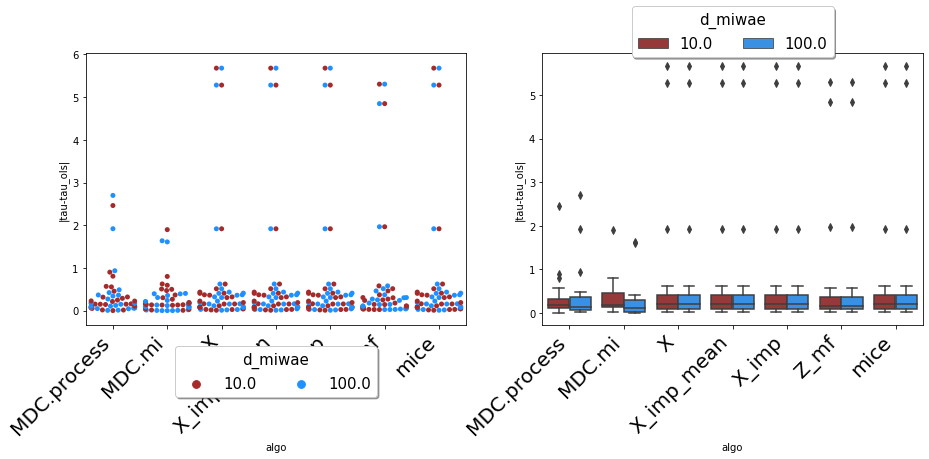

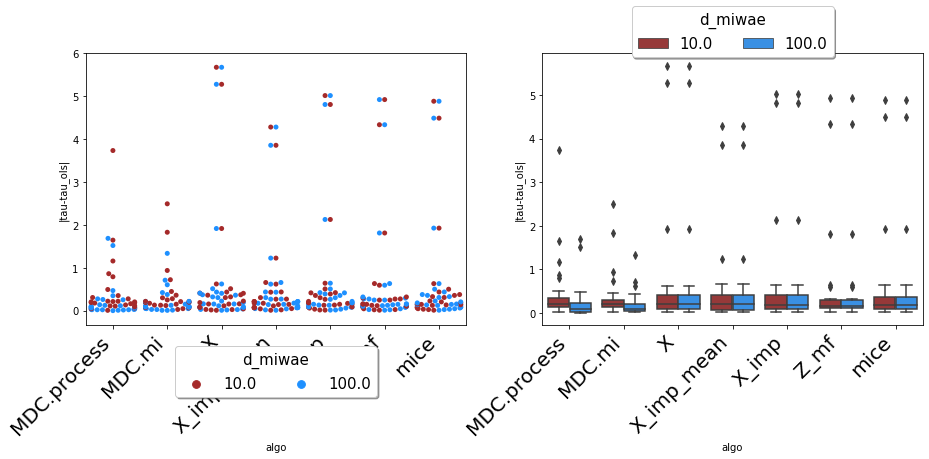

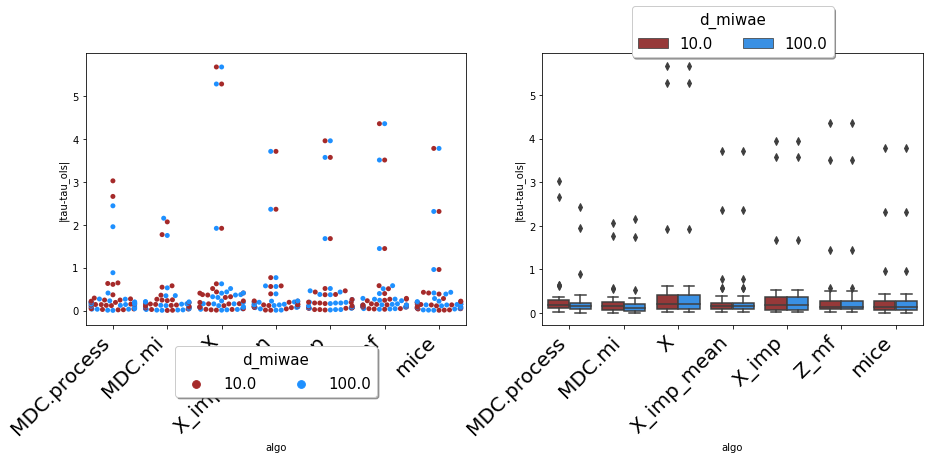

In [281]:
n_epochs = 100
for prop_miss in [0,0.1,0.3]:
    print('Proportion of missing values:',prop_miss)
    if save_plots:
        boxplot_with_baseline(df.loc[(df['add_wy'] == False) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==10) & (df['prop_miss'] == prop_miss)],
                              df_mice_results = df_mice,df_cevae_results = df_cevae,
                              loss = loss, set_id_range = set_id_range,
                              baseline = 'ihdp', full_baseline = full_baseline,
                              hue = 'd_miwae', palette=['brown','dodgerblue'], save_plot = 'varyingP.pdf',
                              ground_truth = gt)
    else:
        boxplot_with_baseline(df.loc[(df['add_wy'] == False) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==10) & (df['prop_miss'] == prop_miss)],
                          df_mice_results = df_mice, df_cevae_results = df_cevae,
                              loss = loss, set_id_range = set_id_range,
                          baseline = 'ihdp', full_baseline = full_baseline,
                          hue = 'd_miwae', palette=['brown','dodgerblue'],
                          ground_truth = gt)


## Number of epochs

In [ ]:
for p in [5, 100]:
    print('Proportion of missing values:',prop_miss)
    if save_plots:
        boxplot_with_baseline(df.loc[(df['add_wy'] == False) & (df['citcio'] == False) & (df['prop_miss']==0.1) & (df['sig_prior']==0.1) & (df['p'] == p)], 
                              df_mice_results = df_mice, loss = loss,
                              hue = 'n_epochs', palette=['orange','green'], save_plot = 'varyingN_epochs.pdf')
    else: 
        boxplot_with_baseline(df.loc[(df['add_wy'] == False) & (df['citcio'] == False) & (df['prop_miss']==0.1) & (df['sig_prior']==0.1) & (df['p'] == p)], 
                          df_mice_results = df_mice, loss = loss,
                          hue = 'n_epochs', palette=['orange','green'])


In [ ]:
for p in [5, 100]:
    print('Proportion of missing values:',prop_miss)
    if save_plots:
        boxplot_with_baseline(df.loc[(df['add_wy'] == False) & (df['citcio'] == True) & (df['prop_miss']==0.1) & (df['sig_prior']==0.1) & (df['p'] == p)], 
                              df_mice_results = df_mice, loss = loss,
                              hue = 'n_epochs', palette=['orange','green'], save_plot = 'varyingN_epochs.pdf')
    else:
        boxplot_with_baseline(df.loc[(df['add_wy'] == False) & (df['citcio'] == True) & (df['prop_miss']==0.1) & (df['sig_prior']==0.1) & (df['p'] == p)], 
                          df_mice_results = df_mice, loss = loss,
                          hue = 'n_epochs', palette=['orange','green'])


In [ ]:
df_ = df_mice
df_ = df_.loc[df_['p']==100]
df_ = df_.loc[df_['prop_miss']==.1]
df_ = df_.loc[df_['model']=='lrmf']
df_ = df_.loc[df_['citcio']==False]
sns.swarmplot(x="n", y=loss,hue="seed", data=df_)

In [ ]:
df_ = df
# df_ = df_.loc[df_['n_epochs']==400]
df_ = df_.loc[df_['p']==100]
df_ = df_.loc[df_['prop_miss']==.1]
df_ = df_.loc[df_['model']=='lrmf']
df_ = df_.loc[df_['sig_prior']==.1]
sns.swarmplot(x="n_epochs", y=loss,hue="seed", data=df_)

In [ ]:
df_ = df
# df_ = df_.loc[df_['n_epochs']==400]
df_ = df_.loc[df_['p']==100]
df_ = df_.loc[df_['prop_miss']==.1]
df_ = df_.loc[df_['model']=='dlvm']
df_ = df_.loc[df_['sig_prior']==.1]
df_ = df_.loc[df_['citcio'] == False]
sns.swarmplot(x="n_epochs", y=loss,hue="seed", data=df_)

In [ ]:
boxplot_with_baseline(df_, loss = loss)

In [ ]:
df_base = get_baseline(model="dlvm", show=True, loss = loss)

In [ ]:
df_base_lrmf = get_baseline(model="lrmf", show=True, loss = loss)

In [ ]:
correlation_tau(df)

In [ ]:
#sns.pairplot(df[l_tau])

### Looking only at DLVM data results

In [ ]:
best_params, df_best = get_best_params(df.loc[df['model']=='dlvm'], loss = loss)

In [ ]:
boxplot_with_baseline(df_best, loss = loss)

In [ ]:
df_ = df
# df_ = df_.loc[df_['n_epochs']==400]
#df_ = df_.loc[df_['p']==100]
df_ = df_.loc[df_['prop_miss']==.3]
df_ = df_.loc[df_['model']=='dlvm']
df_ = df_.loc[df_['sig_prior']==0.1]
df_ = df_.loc[df_['n_epochs']==10]
sns.swarmplot(x="p", y=loss,hue="seed", data=df_)

In [ ]:
df_ = df
# df_ = df_.loc[df_['n_epochs']==400]
df_ = df_.loc[df_['p']==100]
df_ = df_.loc[df_['prop_miss']==.3]
df_ = df_.loc[df_['model']=='dlvm']
df_ = df_.loc[df_['sig_prior']==0.1]
sns.swarmplot(x="n_epochs", y=loss,hue="seed", data=df_)

#### Prop_miss = 0.1, small variance prior

In [ ]:
df_ = df
df_ = df_.loc[df_['n_epochs']==10]
df_ = df_.loc[df_['p']==100]
df_ = df_.loc[df_['prop_miss']==.1]
df_ = df_.loc[df_['model']=='dlvm']
df_ = df_.loc[df_['sig_prior']==.1]

boxplot_with_baseline(df_, loss = loss)

#### Prop_miss = 0.3, small variance prior

In [ ]:
df_ = df
df_ = df_.loc[df_['n_epochs']==10]
df_ = df_.loc[df_['p']==100]
df_ = df_.loc[df_['prop_miss']==.3]
df_ = df_.loc[df_['model']=='dlvm']
df_ = df_.loc[df_['sig_prior']==.1]

boxplot_with_baseline(df_, loss = loss)

#### Prop_miss = 0.1, large variance prior

In [ ]:
df_ = df
df_ = df_.loc[df_['n_epochs']==10]
df_ = df_.loc[df_['p']==100]
df_ = df_.loc[df_['prop_miss']==.1]
df_ = df_.loc[df_['model']=='dlvm']
df_ = df_.loc[df_['sig_prior']==10]

boxplot_with_baseline(df_, loss = loss)

#### Prop_miss = 0.3, large variance prior

In [ ]:
df_ = df
df_ = df_.loc[df_['n_epochs']==10]
df_ = df_.loc[df_['p']==100]
df_ = df_.loc[df_['prop_miss']==.3]
df_ = df_.loc[df_['model']=='dlvm']
df_ = df_.loc[df_['sig_prior']==10]

boxplot_with_baseline(df_, loss = loss)

### Interaction of parameters `p` and `sig_prior`

In [ ]:
df_ = df
#df_ = df_.loc[df_['p']==100]
df_ = df_.loc[df_['prop_miss']==.3]
df_ = df_.loc[df_['model']=='dlvm']
#df_ = df_.loc[df_['sig_prior']==0.1]
df_ = df_.loc[df_['n_epochs']==10]

#df_ = df_.groupby(['sig_prior','p']).mean()
#df_ = df_.reset_index(level=['sig_prior','p'])
sns.swarmplot(x="sig_prior", y=loss,hue="p", data=df_)

In [ ]:
df_ = df
#df_ = df_.loc[df_['p']==100]
df_ = df_.loc[df_['prop_miss']==.3]
df_ = df_.loc[df_['model']=='dlvm']
#df_ = df_.loc[df_['sig_prior']==0.1]
df_ = df_.loc[df_['n_epochs']==10]

df_ = df_.groupby(['sig_prior','p']).mean()
df_ = df_.reset_index(level=['sig_prior','p'])
sns.swarmplot(x="sig_prior", y=loss,hue="p", data=df_)

## CITCIO = True

### LRMF

In [ ]:
best_params, df_best = get_best_params(df.loc[(df['model']=='lrmf') & (df['citcio'])], loss = loss)

In [ ]:
boxplot_with_baseline(df_best, loss = loss)